In [17]:
import numpy as np
from matplotlib import pyplot as plt


In [18]:
fs = 20000000 #sampling frequency
fftSize = 1024 #number of samples
aveN = 256 #number of fft's to be averaged together
samples = np.fromfile(r"/calibration-data/saved_signals/RBi32rrcN_01", np.complex64) # Read in file.  We have to tell it what format it is
print(samples.shape)


##Averaging FFT's to beat down the noise
# taking 1D samples array read from file and putting into 2D array rows=aveN,columns=fftSize
Tsamples = np.zeros((aveN,fftSize),dtype=complex)
print(Tsamples.shape)
for k in range(aveN):
    for i in range(fftSize):
        Tsamples[k,i] = samples[i+fftSize*k]

#FFT and shift magnitude
fTsamples = np.zeros((aveN,fftSize),dtype=complex)
for k in range(aveN):
    fTsamples[k,:] = np.fft.fft(Tsamples[k,:],n=fftSize)
    fTsamples[k,:] = np.fft.fftshift(fTsamples[k,:])

#magnitude
TS_mag = np.zeros((aveN,fftSize))
for k in range(aveN):
    TS_mag[k,:] = 10*np.log10(np.abs(fTsamples[k,:]))

#phase
#Do we ever need to average the phase?
S_phase = np.angle(fTsamples[0,:])

#x-axis frequency range
fshift = np.linspace(-fs/2,fs/2,fftSize)

#averag the magnitudes
S_all = np.zeros(fftSize)
for k in range(aveN):
    S_all += TS_mag[k,:]   
S_all = S_all/aveN


(1000000,)
(256, 1024)


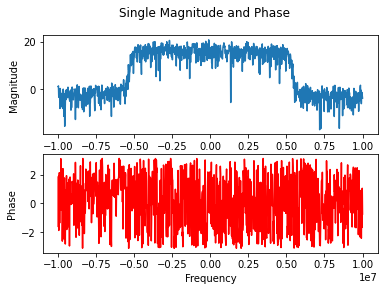

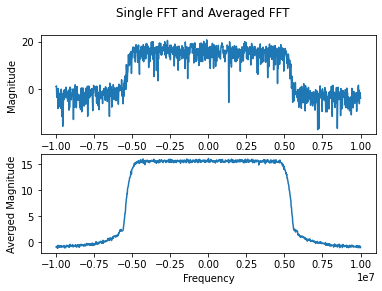

In [19]:

#plot magnitude
fig, axs = plt.subplots(2)
fig.suptitle('Single Magnitude and Phase')
axs[0].plot(fshift, TS_mag[0,:])
axs[0].set(xlabel='Frequency', ylabel='Magnitude')
axs[1].plot(fshift, S_phase,color='red')
axs[1].set(xlabel='Frequency', ylabel='Phase')
plt.show()

#plt.plot(fshift,S_all)
fig, axs = plt.subplots(2)
fig.suptitle('Single FFT and Averaged FFT')
axs[0].plot(fshift, TS_mag[0,:])
axs[0].set(xlabel='Frequency', ylabel='Magnitude')
axs[1].plot(fshift, S_all)
axs[1].set(xlabel='Frequency', ylabel='Averged Magnitude')
plt.show()